In [31]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import glob
import numpy as np
import sys
sys.path.append('../creme/')
import utils
import custom_model
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2024-01-03 03:26:04.682060: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [76]:
pdf_dir = utils.make_dir('pdfs/sufficiency_of_greedy_search_tiles/')

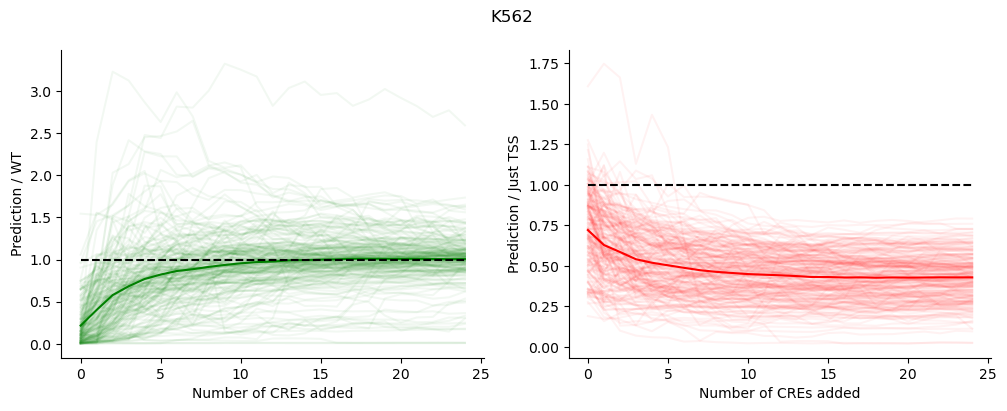

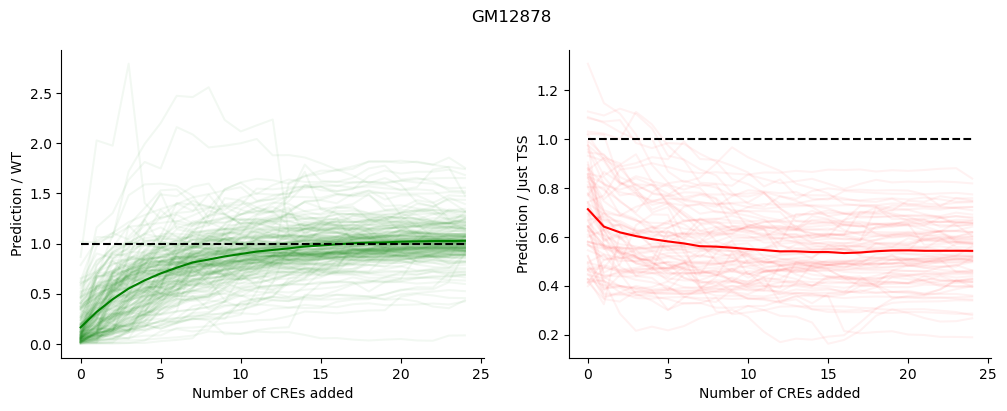

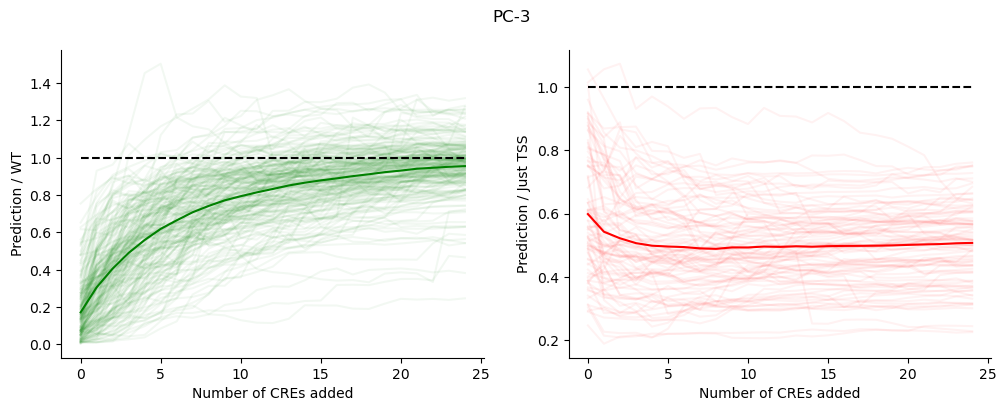

In [77]:
for cell_line in ['K562', 'GM12878', 'PC-3']:
    fig, axes = plt.subplots(1, 2, figsize=[12, 4])
    for g, greedy_search_type in enumerate(['min', 'max']):
        ax = axes[g]
        result_dir = f'../results/higher_order_test_{greedy_search_type}/enformer/sufficiency/{cell_line}/'
        context_df = pd.read_csv(f'../results/summary_csvs/enformer/{cell_line}_selected_contexts.csv')
        if greedy_search_type == 'min':
            norm = 'WT'
            color = 'g'
            element_type = 'Enhancers'
            context_df = context_df[context_df['context'] == 'enhancing']
        elif greedy_search_type == 'max':
            norm = 'Just TSS'
            color = 'r'
            element_type = 'Silencers'
            context_df = context_df[context_df['context'] == 'silencing']
        traces = []
        for i, row in context_df.iterrows():
            
            seq_id = row['path'].split('/')[-1].split('.')[0]
            result_path = f'{result_dir}/{seq_id}.pickle'
            res = utils.read_pickle(result_path)
            res_greedy = utils.read_pickle(result_path.replace('sufficiency', ''))
            wt = res_greedy[0]['initial_pred']
            if element_type == 'Enhancers':
                trace = np.array(res['predictions']) / wt
                
            else:
                trace = np.array(res['predictions']) / res['only_tss_preds']

            traces.append(trace)
            ax.plot(trace, alpha=0.05, c=color)
        ax.set_xlabel('Number of CREs added')
        ax.set_ylabel(f'Prediction / {norm}')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.plot(np.array(traces).mean(axis=0), c=color)
        ax.hlines(1, 0, 24, color='k', linestyles='--')
    plt.suptitle(cell_line)
    fig.savefig(f'{pdf_dir}/{cell_line}.pdf')

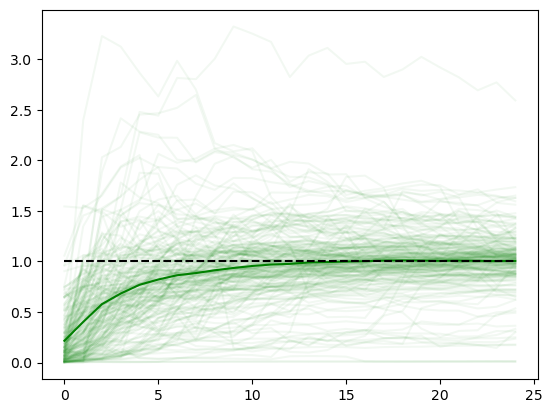

array([0.21510634, 0.40134877, 0.5777097 , 0.6827023 , 0.76888   ,
       0.821513  , 0.8633829 , 0.88493645, 0.91254145, 0.93535423,
       0.9550369 , 0.9690914 , 0.976094  , 0.9896821 , 0.99378425,
       0.99864525, 1.001489  , 1.0081626 , 1.0107849 , 1.009085  ,
       1.0059835 , 1.0089749 , 1.0066074 , 1.0038363 , 1.004859  ],
      dtype=float32)

In [51]:
wt

77.13151

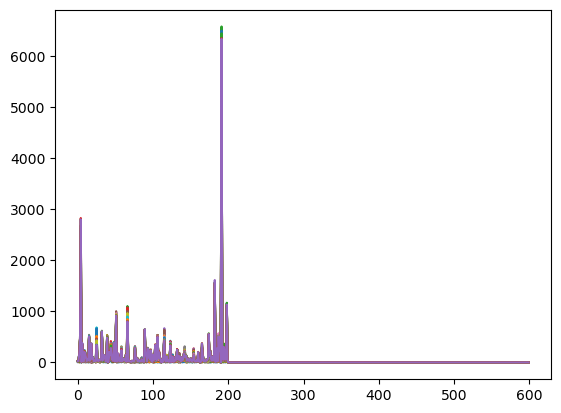

In [21]:
plt.plot(traces)

In [16]:
res

{'only_tss_preds': 5.9057817,
 'predictions': [54.457073,
  136.97697,
  150.24417,
  151.98935,
  163.1329,
  161.72684,
  166.49117,
  166.53044,
  167.81152,
  167.30588,
  164.24771,
  161.43758,
  161.34737,
  161.37961,
  161.5867,
  166.01457,
  169.39142,
  171.01665,
  173.15729,
  171.35971,
  169.84164,
  169.30699,
  167.86273,
  167.50917,
  164.80296],
 'tile_added': [[105804, 110804],
  [100804, 105804],
  [115804, 120804],
  [150804, 155804],
  [120804, 125804],
  [45804, 50804],
  [85804, 90804],
  [155804, 160804],
  [165804, 170804],
  [185804, 190804],
  [125804, 130804],
  [10804, 15804],
  [175804, 180804],
  [170804, 175804],
  [130804, 135804],
  [110804, 115804],
  [90804, 95804],
  [75804, 80804],
  [70804, 75804],
  [25804, 30804],
  [55804, 60804],
  [40804, 45804],
  [20804, 25804],
  [35804, 40804],
  [180804, 185804]]}